In [1]:
%matplotlib inline
import torch
from torch import nn
import numpy as np
from torch.utils import data
from io import StringIO
import random
from d2l import torch as d2l
from matplotlib import pyplot as plt
import matplotlib as mpl
import torchvision
import re
import os
import glob
import pandas as pd
import ipynb_importer
import functions as funcs

importing Jupyter notebook from functions.ipynb


In [26]:
dir_symm_binary = './w_gan_sample_1014/pure_gan_symm_1_2_1_channel_new'
fname_results = glob.glob(os.path.join(dir_symm_binary, '*.pt'))
num_underline = len(re.findall(r'_',fname_results[0]))
print(num_underline)
fname_results.sort(key = lambda x:(int(re.split('[.]',re.split('_',x)[num_underline])[0])))
# fname_results.sort(key = lambda x:(int(re.split('_',x)[9]),
#                                    str(re.split('_',x)[10]),
#                                    int(re.split('_',x)[11])))
g_struct_s = np.empty([len(fname_results),8,2,6,6,6])
sign = -1

for i in fname_results:
    sign += 1
    g_struct = torch.load(i,map_location=torch.device('cpu'))
    g_struct_s[sign,:,:,:,:,:] = g_struct.cpu().detach()

np.set_printoptions(precision=4)    
# moduli_cal_model = torch.load('./total_50_lr_0.0005_epoch_45_moduli_cal_1.pt',map_location=torch.device('cpu'))

10


ValueError: invalid literal for int() with base 10: 'channel'

In [45]:
dir_symm_binary = './good_data'
fname_results = glob.glob(os.path.join(dir_symm_binary, '*.pt'))
g_struct = torch.load(fname_results[4],map_location=torch.device('cpu'))
print(g_struct.shape)
# g_struct_s = np.empty([len(fname_results),117,1,6,6,6])
# sign = -1

# for i in fname_results:
#     sign += 1
#     g_struct = torch.load(i,map_location=torch.device('cpu'))
#     g_struct_s[sign,:,:,:,:,:] = g_struct.cpu().detach()

# np.set_printoptions(precision=4)    


torch.Size([163, 1, 6, 6, 6])


In [4]:
def plot(g_struct):
    g_struct_copy = g_struct.copy()
    alpha_rein = 1.0
    colors_rein = np.empty([6, 6, 6] + [4], dtype=np.float32)
    colors_rein[:] = [251/255, 229/255, 214/255, alpha_rein]  # red
    alpha_matrx = 0.5
    colors_matrx = np.empty([6, 6, 6] + [4], dtype=np.float32)
    colors_matrx[:] = [218/255, 227/255, 243/255, alpha_matrx]  # blue
    ax = plt.figure(figsize=(10,15)).add_subplot(projection='3d')
#     ax.voxels(g_struct_copy, edgecolors=colors_rein, facecolors = colors_rein)
#     ax.voxels((~g_struct_copy.astype(bool)).astype(int), edgecolors=colors_matrx, facecolors = colors_matrx)
#     ax.voxels(g_struct_copy, edgecolor='None', facecolors = colors_rein)
#     ax.voxels((~g_struct_copy.astype(bool)).astype(int), edgecolor='None', facecolors = colors_matrx)
    ax.voxels(g_struct_copy, edgecolors=None, facecolors = colors_rein)
    ax.voxels((~g_struct_copy.astype(bool)).astype(int), edgecolors=None, facecolors = colors_matrx)
    ax.set_xlim(0,6)
    ax.set_ylim(0,6)
    ax.set_zlim(0,6)
    plt.gca().set_box_aspect([1,1,1])
    ax.axis('off')

In [5]:
def choose_data_plot_whole(data,limit_1,limit_2):
    g_struct = data.copy()
    g_struct[:,:,1,:,:,:][g_struct_s[:,:,1,:,:,:]<limit_1] = 1
    g_struct[:,:,1,:,:,:][g_struct_s[:,:,1,:,:,:]>limit_1] = 2
    g_struct[:,:,0,:,:,:][g_struct_s[:,:,0,:,:,:]<limit_2] = 1
    g_struct[:,:,0,:,:,:][g_struct_s[:,:,0,:,:,:]>limit_2] = 2
    return g_struct

In [6]:
def choose_data_plot_whole_limit(data):
    g_struct = data.copy()
    for i in range(100):
        for j in range(8):
            g_struct[i,j,1,:,:,:] = transfer_3d_gan_out_limit_large(g_struct[i,j,1,:,:,:])
            g_struct[i,j,0,:,:,:] = transfer_3d_gan_out_limit_small(g_struct[i,j,0,:,:,:])
    return g_struct

In [7]:
def choose_data_plot_whole_limit_trn(data):
    g_struct = data.copy()
    for i in range(100):
            g_struct[i,0,:,:,:] = transfer_3d_gan_out_limit_small(g_struct[i,0,:,:,:])
    return g_struct

In [8]:
def choose_data_plot_whole_limit_1_channel(data):
    g_struct = data.copy()
    for i in range(5):
        for j in range(8):
            g_struct[i,j,0,:,:,:] = transfer_3d_gan_out_limit_large(g_struct[i,j,0,:,:,:])
    return g_struct

In [9]:
def choose_data_plot(main_id,batch_id,data,limit):
    g_struct = data.copy()
    g_struct[main_id,batch_id,1,:,:,:][g_struct_s[main_id,batch_id,1,:,:,:]<limit] = 1
    g_struct[main_id,batch_id,1,:,:,:][g_struct_s[main_id,batch_id,1,:,:,:]>limit] = 2
    print(sum(sum(sum(g_struct[main_id,batch_id,1,:,:,:]-1))))
    plot(g_struct[main_id,batch_id,1,:,:,:]-1)

In [10]:
def choose_data_plot_0_channel(main_id,batch_id,data,limit):
    g_struct = data.copy()
    g_struct[main_id,batch_id,0,:,:,:][g_struct_s[main_id,batch_id,0,:,:,:]<limit] = 2
    g_struct[main_id,batch_id,0,:,:,:][g_struct_s[main_id,batch_id,0,:,:,:]>limit] = 1
    print(sum(sum(sum(g_struct[main_id,batch_id,0,:,:,:]-1))))
    plot(g_struct[main_id,batch_id,0,:,:,:]-1)

In [11]:
def choose_data_plot_2(main_id,batch_id,data,limit):
    g_struct = data.copy()
    g_struct[main_id,batch_id,0,:,:,:][g_struct_s[main_id,batch_id,0,:,:,:]<limit] = 1
    g_struct[main_id,batch_id,0,:,:,:][g_struct_s[main_id,batch_id,0,:,:,:]>limit] = 2
    print(sum(sum(sum(g_struct[main_id,batch_id,0,:,:,:]-1))))
    plot(g_struct[main_id,batch_id,0,:,:,:]-1)

In [12]:
def transfer_3d_gan_out_limit_large(x_out):
    x_copy = x_out.copy()
    x_new = np.zeros((6,6,6))
    for i in range(56):
        max_index = np.unravel_index(np.argmax(x_copy, axis=None), x_copy.shape)
        x_copy[max_index]=0
        x_new[max_index]=1
    return x_new


In [13]:
def transfer_3d_gan_out_limit_small(x_out):
    x_copy = x_out.copy()
    x_new = np.zeros((6,6,6))
    for i in range(170):
        min_index = np.unravel_index(np.argmin(x_copy, axis=None), x_copy.shape)
        x_copy[min_index]=2
        x_new[min_index]=1
    return x_new

In [14]:
def choose_data_plot_limit(main_id,batch_id,data):
    g_struct = data.copy()
    data_for_plot = transfer_3d_gan_out_limit_large(g_struct_s[main_id,batch_id,1,:,:,:])
    print(sum(sum(sum(data_for_plot))))
    plot(data_for_plot)

In [15]:
def choose_data_plot_limit_1(main_id,batch_id,data):
    g_struct = data.copy()
    data_for_plot = transfer_3d_gan_out_limit_large(g_struct_s[main_id,batch_id,0,:,:,:])
    print(sum(sum(sum(data_for_plot))))
    plot(data_for_plot)

In [16]:
def gen_fem_struct(g_struct_s):
    g_struct = g_struct_s.copy()
    data_for_fem = np.zeros([g_struct.shape[0], g_struct.shape[1], 6**3])
    data_for_fem_wr = np.zeros([g_struct.shape[0], g_struct.shape[1], 56])
    for i in range(g_struct.shape[0]):
        for j in range(g_struct.shape[1]): 
            data = transfer_3d_gan_out_limit_large(g_struct[i,j,1,:,:,:])
            data = data.reshape(-1)           
            data_for_fem[i, j, :] = data
            data_wr = np.argwhere(data == 1) + 1
            out_dir = r'D:/Code/ANSYS/pg_s/sn/d_' + str(i) + '_' + str(j) + '.txt'
            fopen = open(out_dir , 'w')
            np.savetxt(out_dir, data_wr, fmt="%d")
            
    return data_for_fem

In [17]:
fem_strut = gen_fem_struct(g_struct_s)

In [ ]:
# np.argwhere(transfer_3d_gan_out_limit_large(g_struct_s[0,0,1,:,:,:]).reshape(-1)==1)+ 1

In [92]:
# print(fem_strut.shape, '\n' ,fem_strut_out.shape)

56.0


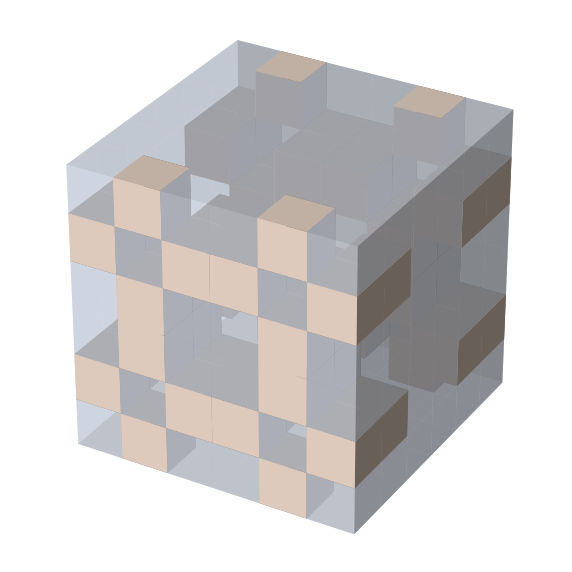

In [99]:
choose_data_plot_limit_1(1,0,g_struct_s)

In [23]:
arr_symm_x, arr_symm_y, arr_symm_z, sta_symm = funcs.symm_check_2c(g_struct_s-1)
g_struct_binary = choose_data_plot_whole_limit(g_struct_s)
arr_symm_x_binary, arr_symm_y_binary, arr_symm_z_binary, sta_symm_binary \
= funcs.symm_check_2c(g_struct_binary)

In [24]:
print(arr_symm_x.shape, '\n', sta_symm,'\n', sta_symm_binary )

(100, 8) 
 [0.7528 0.7485 0.7527] 
 [0.9095 0.904  0.9058]


In [31]:
dir_symm_binary = './w_gan_sample_new/symm_moduli_gan_symm_1_2_new/'
fname_results = glob.glob(os.path.join(dir_symm_binary, '*.pt'))
num_underline = len(re.findall(r'_',fname_results[0]))
print(num_underline)
fname_results.sort(key = lambda x:(int(re.split('[.]',re.split('_',x)[num_underline])[0])))
# fname_results.sort(key = lambda x:(int(re.split('_',x)[9]),
#                                    str(re.split('_',x)[10]),
#                                    int(re.split('_',x)[11])))
g_struct_s_addition = np.empty([len(fname_results),8,2,6,6,6])
sign = -1

for i in fname_results:
    sign += 1
    g_struct = torch.load(i,map_location=torch.device('cpu'))
    g_struct_s_addition[sign,:,:,:,:,:] = g_struct.cpu().detach()

10


In [33]:
arr_symm_x_rand, arr_symm_y_rand, arr_symm_z_rand, sta_symm_rand = funcs.symm_check_2c(g_struct_s_addition-1)
g_struct_binary_rand = choose_data_plot_whole_limit(g_struct_s_addition)
arr_symm_x_binary_rand, arr_symm_y_binary_rand, arr_symm_z_binary_rand, sta_symm_binary_rand \
= funcs.symm_check_2c(g_struct_binary_rand)

In [34]:
print(arr_symm_x_rand.shape, '\n', sta_symm_binary_rand,'\n', sta_symm_binary_rand )

(100, 8) 
 [0.0684 0.0628 0.0641] 
 [0.0684 0.0628 0.0641]


In [36]:
moduli_non, elems_fnl_non, moduli, elems_fnl = torch.load('./training_data/training_data.pt')

In [37]:
sample_ind = [i for i in range(20000)]
trn_sample = random.sample(sample_ind,800)
trn_sample = np.array(trn_sample)
sample_trn_data = elems_fnl_non[trn_sample]
sample_trn_data.shape

(800, 1, 6, 6, 6)

In [38]:
arr_symm_x_trn, arr_symm_y_trn, arr_symm_z_trn, sta_symm_trn = funcs.symm_check_trn(sample_trn_data)

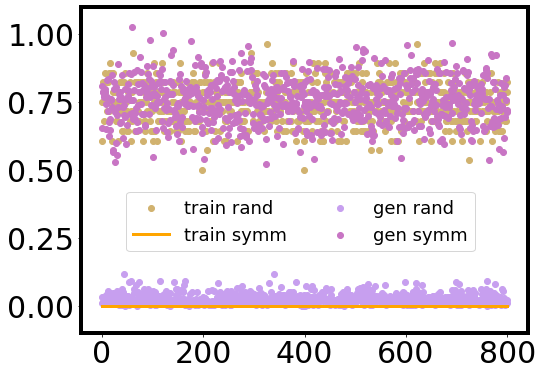

In [41]:
cmap = mpl.cm.turbo
ax = plt.figure(figsize=(8,6))
x_plot = np.linspace(0,800,800)
scatter_rand_trn = plt.scatter(x_plot,arr_symm_x_trn.reshape(1,-1), color = '#d1b26f')
line_symm_trn, = plt.plot([0,800], [0,0], color = '#ffa500', linewidth = 3)
scatter_symm = plt.scatter(x_plot,arr_symm_x.reshape(1,-1), color = '#c875c4')
scatter_rand = plt.scatter(x_plot,arr_symm_x_rand.reshape(1,-1), color = '#c79fef')
ax.gca().spines[['left','right','bottom','top']].set_linewidth(4)
# plt.xlim((0,800))
plt.ylim((-0.1,1.1))
# ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.xticks((0,200,400,600,800))
font_size = 30
plt.legend([scatter_rand_trn, line_symm_trn, scatter_rand, scatter_symm], 
           ['train rand', 'train symm', 'gen rand', 'gen symm'],
           loc=(0.1,0.25), fontsize = 18, ncol = 2)
plt.tick_params(labelsize=font_size)

(-0.1, 1.1)

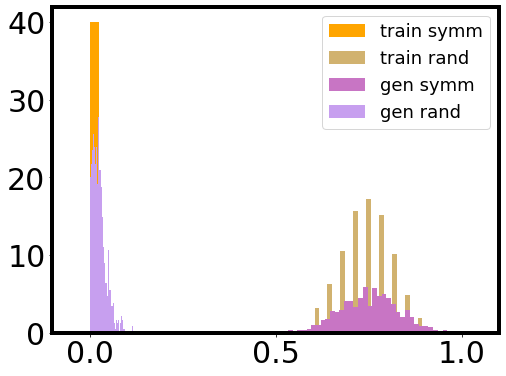

In [70]:
fig, ax = plt.subplots(figsize=(8,6))
labels_s = ['train symm','train rand','gen symm','gen rand']
ax.hist(np.zeros((800,1)), bins = 40, density = True, stacked = True,
                      histtype='bar', color = '#ffa500', label = labels_s[0])
ax.hist(arr_symm_x_trn.reshape(800,1), bins = 40, density = True, stacked = True,
                      histtype='bar', color = '#d1b26f', label = labels_s[1])
ax.hist(arr_symm_x.reshape(800,1), bins = 40, density = True, stacked = True,
                      histtype='bar', color = '#c875c4', label = labels_s[2])
ax.hist(arr_symm_x_rand .reshape(800,1), bins = 40, density = True, stacked = True,
                      histtype='bar', color = '#c79fef', label = labels_s[3])
ax.legend(prop={'size': 18})
font_size = 30
ax.tick_params(labelsize=font_size)
ax.spines[['left','right','bottom','top']].set_linewidth(4)
plt.xlim((-0.1,1.1))